### Read the raw data of plants in Victoria

In [1]:
import pandas as pd
df_plants_atlas_data = pd.read_csv ('records-2020-09-04.csv')

/Users/gunveen/anaconda3/envs/r-tutorial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (52) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#See the shape of the data frame
df_plants_atlas_data.shape

(3497721, 57)

In [3]:
#Check if Record IDs are unique
df_plants_atlas_data['Record ID'].drop_duplicates().shape

(3497721,)

In [4]:
#The columns present in the data
df_plants_atlas_data.columns

Index(['Record ID', 'Catalogue Number', 'Taxon Concept GUID',
       'Scientific Name - original', 'Vernacular name - original',
       'Scientific Name', 'Taxon Rank', 'Vernacular name', 'Kingdom', 'Phylum',
       'Class', 'Order', 'Family', 'Genus', 'Species', 'Subspecies',
       'Data Resource ID', 'Data Resource Name', 'Institution ID',
       'Institution', 'Collection ID', 'Collection', 'Licence',
       'Institution Code', 'Collection Code', 'Locality',
       'Latitude - original', 'Longitude - original',
       'Geodetic datum - original', 'Latitude', 'Longitude',
       'Coordinate Precision', 'Coordinate Uncertainty in Metres',
       'Country - parsed', 'State - parsed', 'Local Government Areas 2011',
       'IMCRA 4 Regions', 'IBRA 7 Regions', 'Minimum elevation in meters',
       'Maximum elevation in meters', 'Minimum depth in meters',
       'Maximum depth in meters', 'Individual count', 'Collector', 'Year',
       'Month', 'Day', 'Event Date - parsed', 'Verbatim even

In [5]:
#Check the state 
df_plants_atlas_data['State - parsed'].drop_duplicates()

0    Victoria
Name: State - parsed, dtype: object

#### We see above that data belongs to only one state Victoria

In [6]:
#Check the plants in the data set
df_plants_atlas_data['Genus'].head()

0    Scleranthus
1          Najas
2    Xerochrysum
3      Ammophila
4      Platysace
Name: Genus, dtype: object

In [7]:
df_plants_atlas_data['Genus'].drop_duplicates().shape

(2537,)

#### The data has information on 2537 differnt plants

### Read the toxic plants data

In [8]:
df_plants_toxic_data = pd.read_excel('Toxic Plant List.xlsx')

In [9]:
df_plants_toxic_data.shape

(415, 4)

#### The dataframe has 415 rows and 4 columns

In [10]:
df_plants_toxic_data.columns

Index(['Common Name', 'Aliases', 'Scientific Name', 'Family'], dtype='object')

In [11]:
df_plants_toxic_data['Common Name'].drop_duplicates().shape

(412,)

In [12]:
# Filter the data of toxic plants on the basis of common name
result = pd.merge(df_plants_atlas_data[['Record ID',
       'Scientific Name - original',
       'Scientific Name','Family', 'Genus', 'Species','Latitude', 'Longitude',
       'Country - parsed', 'State - parsed', 'Local Government Areas 2011','Year',
       'Month', 'Day', 'Event Date - parsed', 
       'Basis Of Record - original']],
                 df_plants_toxic_data['Common Name'],
                 left_on='Genus',right_on='Common Name',how='inner')

In [13]:
result.head()

,Record ID,Scientific Name - original,Scientific Name,Family,Genus,Species,Latitude,Longitude,Country - parsed,State - parsed,Local Government Areas 2011,Year,Month,Day,Event Date - parsed,Basis Of Record - original,Common Name
0,fff3e636-46e0-4189-b8e2-7b55f94cc83e,Geranium potentilloides,Geranium potentilloides,Geraniaceae,Geranium,Geranium potentilloides,-37.3066,148.7594,Australia,Victoria,East Gippsland (S),1986.0,3.0,1.0,1986-03-01,HumanObservation,Geranium
1,ffcef231-c64c-41dd-a35d-e8a2d043a0ea,Geranium sp. 5,Geranium sp. Pleated sepals (D.E.Albrecht 4707),Geraniaceae,Geranium,Geranium sepals,-36.7247,144.3047,Australia,Victoria,Greater Bendigo (C),2006.0,3.0,7.0,2006-03-07,HumanObservation,Geranium
2,ffcb725d-c725-4aa9-91b8-5472c8745ad9,Geranium potentilloides,Geranium potentilloides,Geraniaceae,Geranium,Geranium potentilloides,-36.9933,147.8258,Australia,Victoria,East Gippsland (S),1986.0,3.0,1.0,1986-03-01,HumanObservation,Geranium
3,ff6e4c4f-2978-4c71-8a7d-ee273e181784,Geranium spp.,Geranium,Geraniaceae,Geranium,NaN,-38.4540,146.9170,Australia,Victoria,Wellington (S),2011.0,3.0,29.0,2011-03-29,HumanObservation,Geranium
4,ff4f2a27-95d7-4ceb-aab1-b67f51959619,Geranium spp.,Geranium,Geraniaceae,Geranium,NaN,-36.2916,146.5577,Australia,Victoria,Wangaratta (RC),2002.0,3.0,29.0,2002-03-29,HumanObservation,Geranium


In [14]:
result.shape

(210698, 17)

#### The filtered data has only 210698 records as cmpared to 3497721 recods in the complete data

In [15]:
result['Common Name'].drop_duplicates().shape

(28,)

#### Data contains only 28 toxic plants as compared to the total of 412 toxic plants

In [16]:
result.isna().sum()

Record ID                         0
Scientific Name - original       15
Scientific Name                   0
Family                            0
Genus                             0
Species                        7387
Latitude                        791
Longitude                       791
Country - parsed                  0
State - parsed                    0
Local Government Areas 2011    1477
Year                           2232
Month                          3881
Day                            6553
Event Date - parsed            2249
Basis Of Record - original     1983
Common Name                       0
dtype: int64

#### As we intented to plot the location of the plants we will remove all the records that do not have latitude and logitude information

In [17]:
cleaned_plants=result[result['Latitude'].notna()]

In [18]:
cleaned_plants.isna().sum()

Record ID                         0
Scientific Name - original       15
Scientific Name                   0
Family                            0
Genus                             0
Species                        7344
Latitude                          0
Longitude                         0
Country - parsed                  0
State - parsed                    0
Local Government Areas 2011     686
Year                           2031
Month                          3611
Day                            6099
Event Date - parsed            2049
Basis Of Record - original     1979
Common Name                       0
dtype: int64

In [19]:
#Exctract only the important columns  
plants=cleaned_plants[['Record ID','Scientific Name','Latitude','Longitude','Country - parsed','State - parsed','Common Name']]
plants.to_csv('plants_atlas_data.csv',index = False)

### Plot data on Map

In [20]:
BBox = ((plants.Longitude.min(),   plants.Longitude.max(),      
         plants.Latitude.min(), plants.Latitude.max()))
print(BBox)

(140.9638, 149.9741666667, -39.135, -34.0038)


In [21]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# boundry_map = plt.imread('map (1).png')

(-39.135, -34.0038)

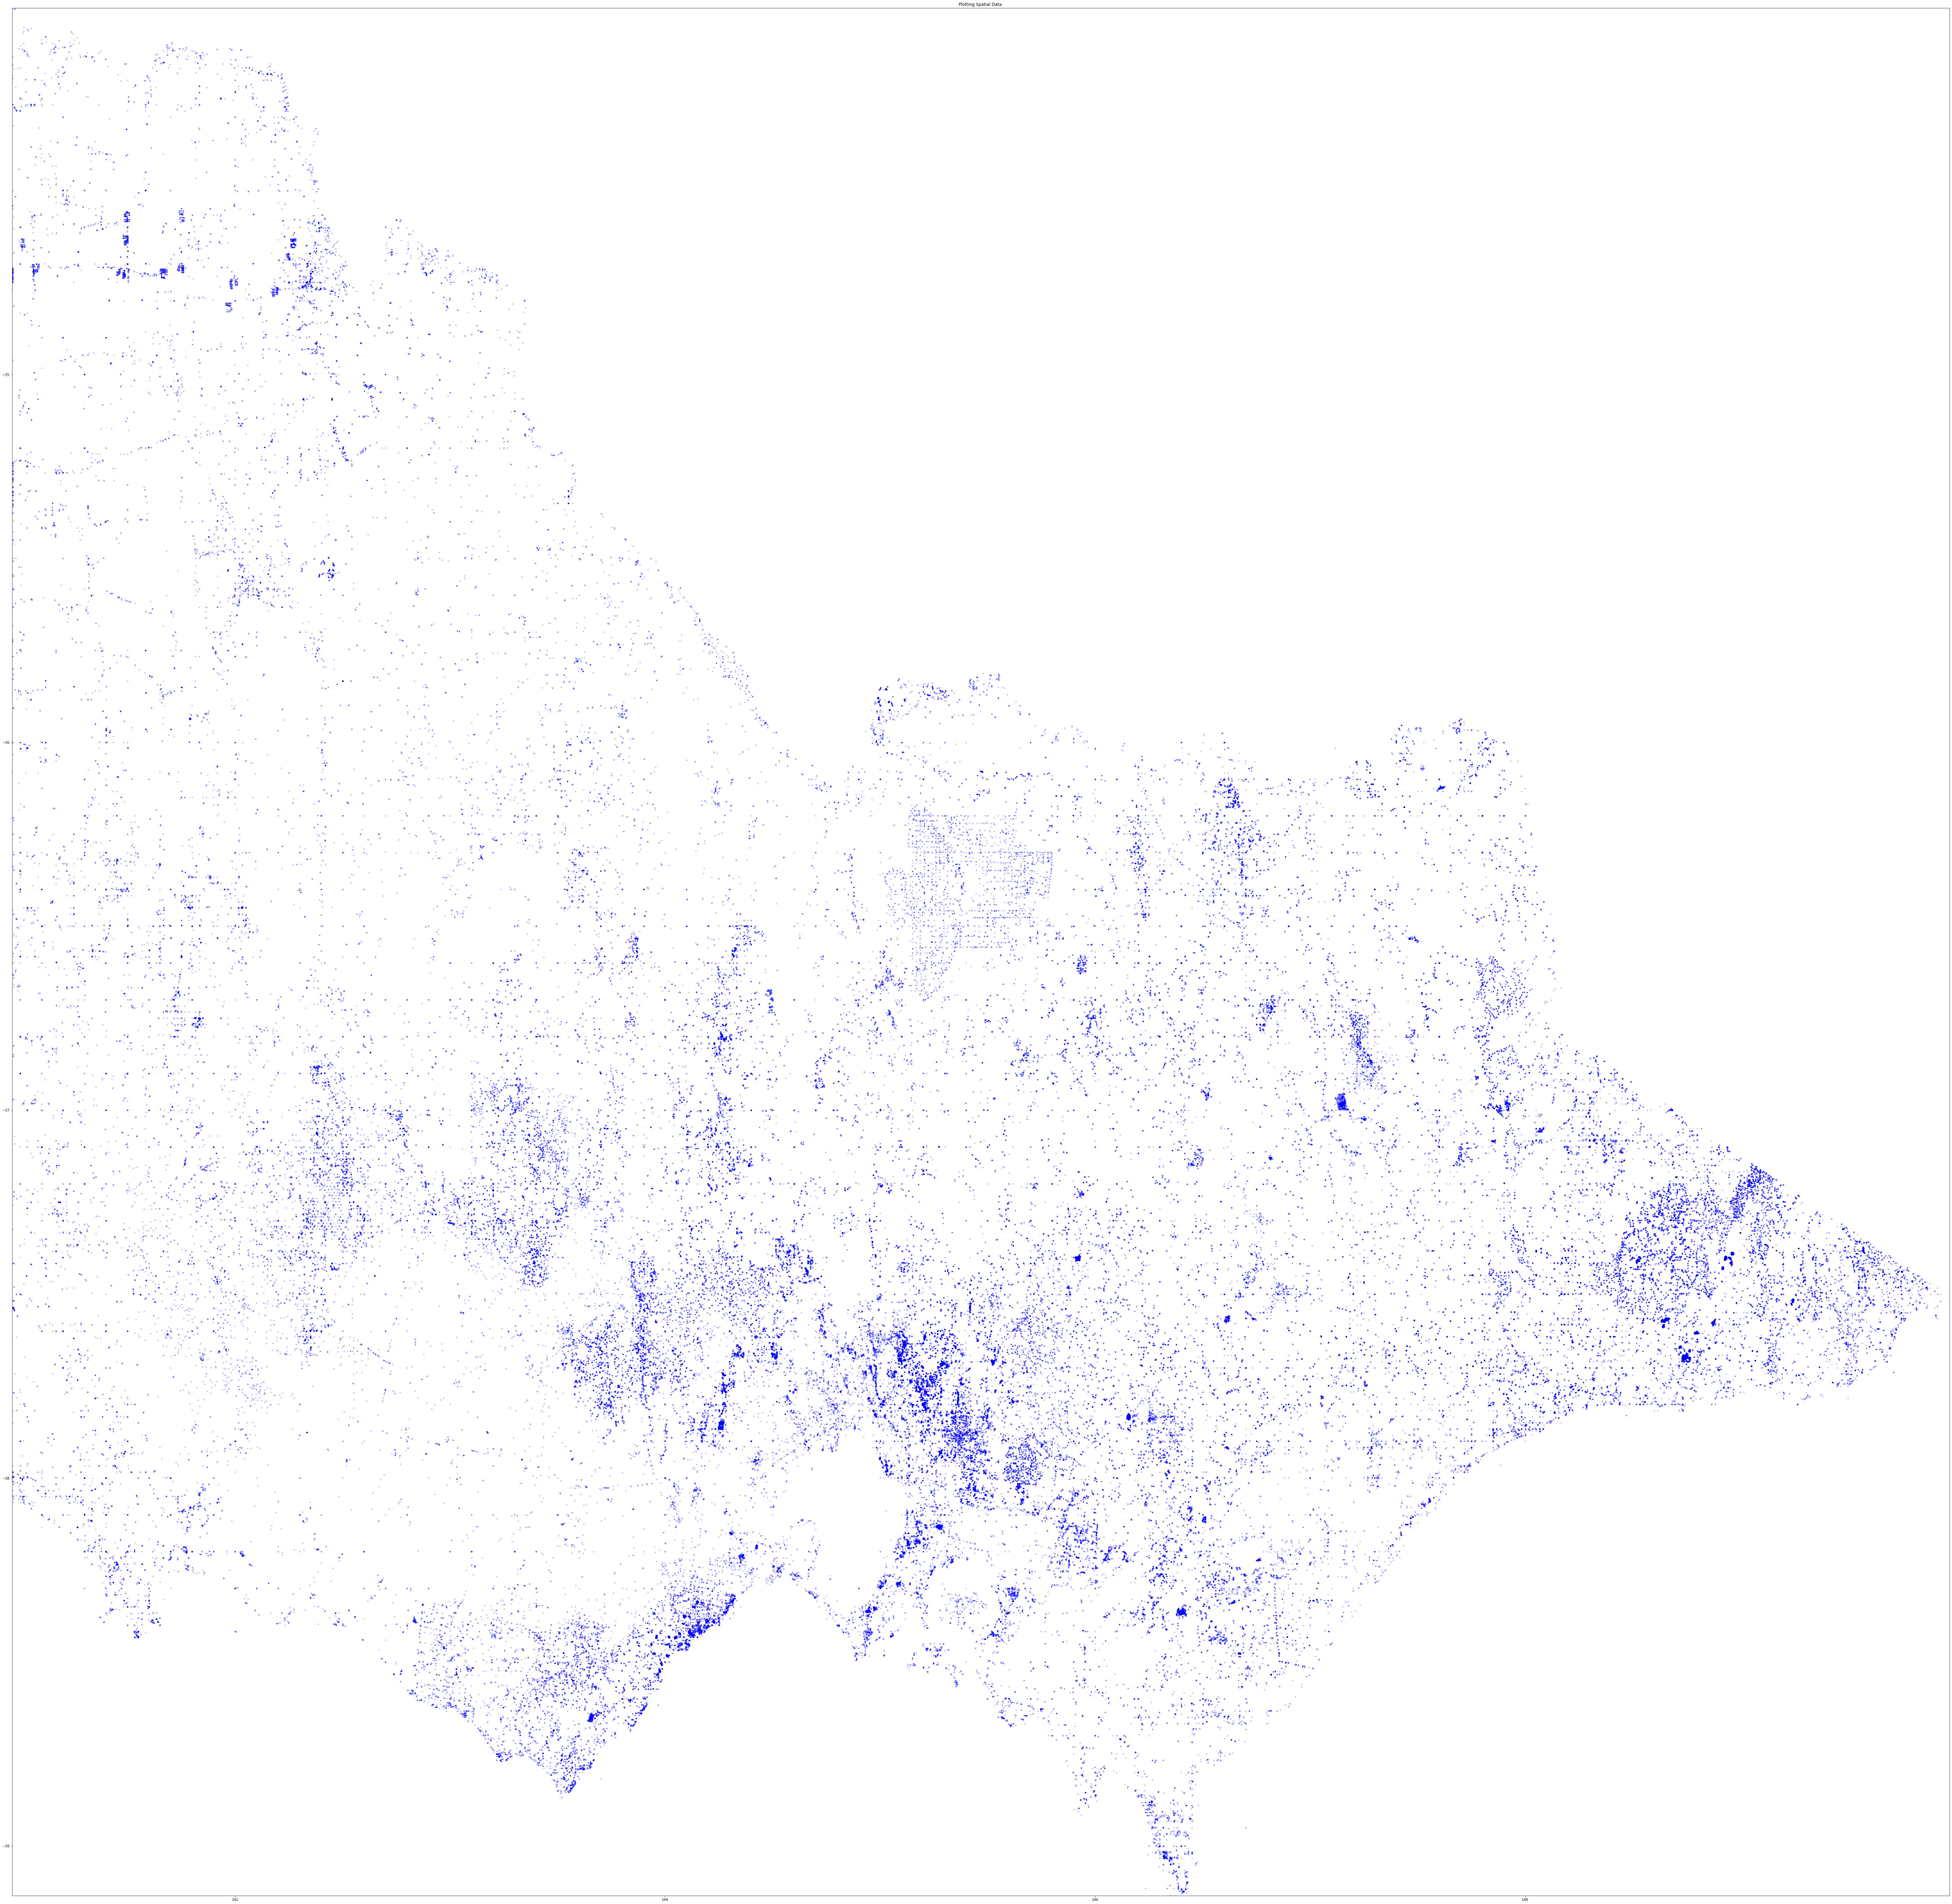

In [23]:
fig, ax = plt.subplots(figsize = (100,100))
ax.scatter(plants.Longitude, plants.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data ')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
#ax.imshow(boundry_map, zorder=0, extent = BBox, aspect= 'equal')

#### The above map shows that the data is spread in region of Victoria

In [24]:
plants.head()

,Record ID,Scientific Name,Latitude,Longitude,Country - parsed,State - parsed,Common Name
0,fff3e636-46e0-4189-b8e2-7b55f94cc83e,Geranium potentilloides,-37.3066,148.7594,Australia,Victoria,Geranium
1,ffcef231-c64c-41dd-a35d-e8a2d043a0ea,Geranium sp. Pleated sepals (D.E.Albrecht 4707),-36.7247,144.3047,Australia,Victoria,Geranium
2,ffcb725d-c725-4aa9-91b8-5472c8745ad9,Geranium potentilloides,-36.9933,147.8258,Australia,Victoria,Geranium
3,ff6e4c4f-2978-4c71-8a7d-ee273e181784,Geranium,-38.4540,146.9170,Australia,Victoria,Geranium
4,ff4f2a27-95d7-4ceb-aab1-b67f51959619,Geranium,-36.2916,146.5577,Australia,Victoria,Geranium


In [25]:
plants_cluster=plants[['Common Name','Latitude','Longitude']]
plants_cluster.head()

,Common Name,Latitude,Longitude
0,Geranium,-37.3066,148.7594
1,Geranium,-36.7247,144.3047
2,Geranium,-36.9933,147.8258
3,Geranium,-38.4540,146.9170
4,Geranium,-36.2916,146.5577


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

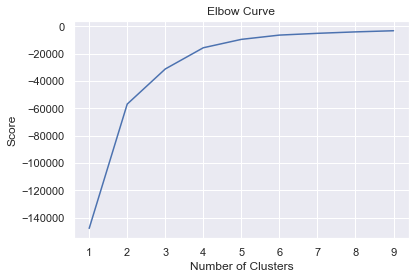

In [29]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = plants_cluster[['Latitude']]
X_axis = plants_cluster[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [30]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(plants_cluster[plants_cluster.columns[1:3]]) # Compute k-means clustering.
plants_cluster['cluster_label'] = kmeans.fit_predict(plants_cluster[plants_cluster.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(plants_cluster[plants_cluster.columns[1:3]]) # Labels of each point
plants_cluster.head(10)

/Users/gunveen/anaconda3/envs/r-tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Common Name,Latitude,Longitude,cluster_label
0,Geranium,-37.3066,148.7594,1
1,Geranium,-36.7247,144.3047,0
2,Geranium,-36.9933,147.8258,1
3,Geranium,-38.4540,146.9170,2
4,Geranium,-36.2916,146.5577,2
5,Geranium,-37.4277,148.9166,1
6,Geranium,-37.8894,145.9494,2
7,Geranium,-36.8510,148.1080,1
8,Geranium,-37.5513,148.7136,1
9,Geranium,-36.7334,146.3336,2


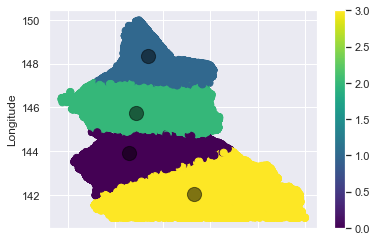

In [31]:
plants_cluster.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)